In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
plt.style.use('ggplot')
from statistics import mean
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
import scipy as sp
import scipy.stats as stats

from statsmodels.stats.proportion import proportions_ztest

In [2]:
ad_marital_status = pd.read_excel ('../Data/AD-by-marital-status.xls')

In [3]:
ad_marital_status.head()

,Pay Grade,Single Male,Single Female,Single Total,Single Parent Male,Single Parent Female,Single Parent Total,Joint Service Marriage Male,Joint Service Marriage Female,Joint Service Marriage Total,Civilian Married Male,Civilian Married Female,Civilian Married Total,Total Male,Total Female,Grand Total
0,E-1,31229,5717,36946,563,122,685,139,141,280,5060,719,5779,36991,6699,43690
1,E-2,53094,8388,61482,1457,275,1732,438,579,1017,12483,1682,14165,67472,10924,78396
2,E-3,131091,21019,152110,4264,1920,6184,3579,4902,8481,54795,6641,61436,193729,34482,228211
3,E-4,112710,16381,129091,9491,4662,14153,8661,9778,18439,105556,9961,115517,236418,40782,277200
4,E-5,57989,11021,69010,10937,6576,17513,12459,11117,23576,130944,8592,139536,212329,37306,249635


In [4]:
enlisted_df = ad_marital_status[:10]
enlisted_df

,Pay Grade,Single Male,Single Female,Single Total,Single Parent Male,Single Parent Female,Single Parent Total,Joint Service Marriage Male,Joint Service Marriage Female,Joint Service Marriage Total,Civilian Married Male,Civilian Married Female,Civilian Married Total,Total Male,Total Female,Grand Total
0,E-1,31229,5717,36946,563,122,685,139,141,280,5060,719,5779,36991,6699,43690
1,E-2,53094,8388,61482,1457,275,1732,438,579,1017,12483,1682,14165,67472,10924,78396
2,E-3,131091,21019,152110,4264,1920,6184,3579,4902,8481,54795,6641,61436,193729,34482,228211
3,E-4,112710,16381,129091,9491,4662,14153,8661,9778,18439,105556,9961,115517,236418,40782,277200
4,E-5,57989,11021,69010,10937,6576,17513,12459,11117,23576,130944,8592,139536,212329,37306,249635
5,E-6,19125,4654,23779,10369,4962,15331,8474,6961,15435,110322,5827,116149,148290,22404,170694
6,E-7,5446,1913,7359,6530,2585,9115,5065,3291,8356,70001,3206,73207,87042,10995,98037
7,E-8,1009,438,1447,1786,513,2299,1423,651,2074,21079,820,21899,25297,2422,27719
8,E-9,381,202,583,579,144,723,458,150,608,8215,291,8506,9633,787,10420
9,TOTAL ENLISTED,412074,69733,481807,45976,21759,67735,40696,37570,78266,518455,37739,556194,1017201,166801,1184002


In [22]:
officer_df = ad_marital_status[10:21]
enlisted_df = ad_marital_status[:10]

In [ ]:
warrant_df = ad_marital_status[21:27]

In [ ]:
enlisted_df2 = enlisted_df.drop(columns=['Single Total', 'Joint Service Marriage Total', 'Single Parent Total', 'Civilian Married Total', 'Grand Total','Total Male', 'Total Female'])

In [ ]:
enlisted_df3 = enlisted_df.drop(columns=['Single Male', 'Single Female', 'Joint Service Marriage Male', 'Joint Service Marriage Female','Single Parent Male','Single Parent Female', 'Civilian Married Male','Civilian Married Female', 'Grand Total','Total Male', 'Total Female'])

In [ ]:
officer_df = ad_marital_status[10:20]
officer_df3 = officer_df.drop(columns=['Single Male', 'Single Female', 'Joint Service Marriage Male', 'Joint Service Marriage Female','Single Parent Male','Single Parent Female', 'Civilian Married Male','Civilian Married Female', 'Grand Total','Total Male', 'Total Female'])
single_total= officer_df3['Single Total'].values
single_parent_total = officer_df3['Single Parent Total'].values
joint_service_marriage_total= officer_df3['Joint Service Marriage Total'].values
civilian_married_total = officer_df3['Civilian Married Total'].values



In [ ]:
labels= ['O-1','0-2','O-3','O-4','O-5','O-6','O-7','O-8', 'O-9', 'O-10']

x=np.arange(len(labels))
width = 0.23

fig, ax = plt.subplots(figsize=(20,8)) 
rects1 = ax.bar(x, single_total ,width, label='Single Total')
rects2 = ax.bar(x+width,single_parent_total ,width, label='Single Parent Total')
rects3 = ax.bar(x+2*width,joint_service_marriage_total ,width, label='Joint Service Married Total')
ects4 = ax.bar(x+3*width, civilian_married_total ,width, label='Civilian Married Total')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
plt.xticks(x+width, labels)
plt.legend(loc="upper right")
plt.title('Officer Service Members by Marital Status')
plt.xlabel('Officer Pay Grade')
plt.ylabel('Number of Service Members')
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()



In [ ]:
enlisted_df3 = enlisted_df.drop(columns=['Single Male', 'Single Female', 'Joint Service Marriage Male', 'Joint Service Marriage Female','Single Parent Male','Single Parent Female', 'Civilian Married Male','Civilian Married Female', 'Grand Total','Total Male', 'Total Female'])
single_total2= enlisted_df3['Single Total'].values
single_parent_total2 = enlisted_df3['Single Parent Total'].values
joint_service_marriage_total2= enlisted_df3['Joint Service Marriage Total'].values
civilian_married_total2 = enlisted_df3['Civilian Married Total'].values


In [ ]:
enlisted_df.set_index('Pay Grade')
df = enlisted_df.set_index('Pay Grade')
df['Total Married'] = enlisted_df['Joint Service Marriage Total'].values + enlisted_df['Civilian Married Total'].values
married_enlisted = df['Total Married'].values

officer_df.set_index('Pay Grade')
df2 = officer_df.set_index('Pay Grade')
df2['Total Married'] = officer_df['Joint Service Marriage Total'].values + officer_df['Civilian Married Total'].values
married_officers =df2['Total Married'].values




In [ ]:
ad_marital_index = ad_marital_status.set_index('Pay Grade')

js_married_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Joint Service Marriage Total'].values)
civ_married_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Civilian Married Total'].values)
total_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Grand Total'].values)
enlisted_married = int(js_married_e) + int(civ_married_e)

In [ ]:
married_mean_e = enlisted_married/total_e


In [3]:
ad_marital_index = ad_marital_status.set_index('Pay Grade')

js_married_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Joint Service Marriage Total'].values)
civ_married_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Civilian Married Total'].values)

total_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Grand Total'].values)
enlisted_married = int(js_married_e) + int(civ_married_e)
married_prop_e = enlisted_married/total_e


NameError: name 'ad_marital_status' is not defined

In [4]:
ad_marital_index = ad_marital_status.set_index('Pay Grade')

js_married_o = int(ad_marital_index.loc[['TOTAL OFFICER'],'Joint Service Marriage Total'].values)
civ_married_o = int(ad_marital_index.loc[['TOTAL OFFICER'],'Civilian Married Total'].values)
total_o = int(ad_marital_index.loc[['TOTAL OFFICER'],'Grand Total'].values)
officer_married = int(js_married_o) + int(civ_married_o)
married_prop_o = officer_married/total_o

NameError: name 'ad_marital_status' is not defined

In [5]:
married_prop_o, married_prop_e

NameError: name 'married_prop_o' is not defined

In [6]:
significance = 0.025

sample_prop_e, sample_size_e = (married_prop_e, total_e)
sample_prop_o, sample_size_o = (married_prop_o, total_o)

successes = np.array([sample_prop_e, sample_prop_o])
samples = np.array([sample_size_e, sample_size_o])


stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

if p_value > significance:
   print("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print("Reject the null hypothesis - suggest the alternative hypothesis is true")

NameError: name 'married_prop_e' is not defined

In [7]:
single_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Single Total'].values)
single_parent_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Single Parent Total'].values)
single_o = int(ad_marital_index.loc[['TOTAL OFFICER'],'Single Total'].values)
single_parent_o = int(ad_marital_index.loc[['TOTAL OFFICER'],'Single Parent Total'].values)

unmarried_total_e = single_parent_e + single_e
unmarried_total_o = single_parent_o + single_o
unmarried_total = unmarried_total_e + unmarried_total_o

unmarried_prop_e = unmarried_total_e/unmarried_total
unmarried_prop_o = unmarried_total_o/unmarried_total
unmarried_prop = unmarried_total / total_sm



NameError: name 'ad_marital_index' is not defined

In [96]:
total_sm =total_e + total_o
all_married = enlisted_married + officer_married
married_prop = all_married / total_sm
married_prop

0.5598953388983502

In [97]:
ad_marital_status = pd.read_excel ('../Data/AD-by-marital-status.xls')
ad_marital_index = ad_marital_status.set_index('Pay Grade')

enlisted_df = ad_marital_status[:9]
enlisted_totals = enlisted_df.drop(columns=['Single Male', 'Single Female', 'Joint Service Marriage Male', 'Joint Service Marriage Female', \
    'Single Parent Male','Single Parent Female', 'Civilian Married Male','Civilian Married Female', 'Grand Total','Total Male', 'Total Female'])
officer_df = ad_marital_status[10:20]
officer_totals = officer_df.drop(columns=['Single Male', 'Single Female', 'Joint Service Marriage Male', 'Joint Service Marriage Female',\
    'Single Parent Male','Single Parent Female', 'Civilian Married Male','Civilian Married Female', 'Grand Total','Total Male', 'Total Female'])


In [98]:
def marital_status_bar_mean(df ):

    single_total = df['Single Total'].values
    single_parent_total = df['Single Parent Total'].values
    joint_service_marriage_total = df['Joint Service Marriage Total'].values
    civilian_married_total = df['Civilian Married Total'].values

    single_total_mean =np.mean(single_total)
    single_parent_total_mean =np.mean(single_parent_total)
    joint_service_marriage_total_mean = np.mean(joint_service_marriage_total)
    civilian_married_total_mean = np.mean(civilian_married_total)
    y = single_parent_total_mean, single_parent_total_mean, joint_service_marriage_total_mean, civilian_married_total_mean
    labels = ['Single', 'Single Parent', 'Joint Service Marriage', 'Civilian Marriage' ]

    x=np.arange(len(labels))
    width = 0.23

    fig, ax = plt.subplots(figsize=(20,8)) 
    plt.bar(x, y,color=['red', 'blue', 'green', 'black'] )
    

   
    plt.xticks(x, labels)
    if len(df.index) > 9:
        rank = "Officers"
    else:
        rank = "Enlisted"
        
    plt.title('{} by Marital Status'.format(rank))
    plt.xlabel('Marital Status')
    plt.ylabel('Average Number of Service Members')
    plt.rcParams.update({'font.size': 18})
    return plt.show()

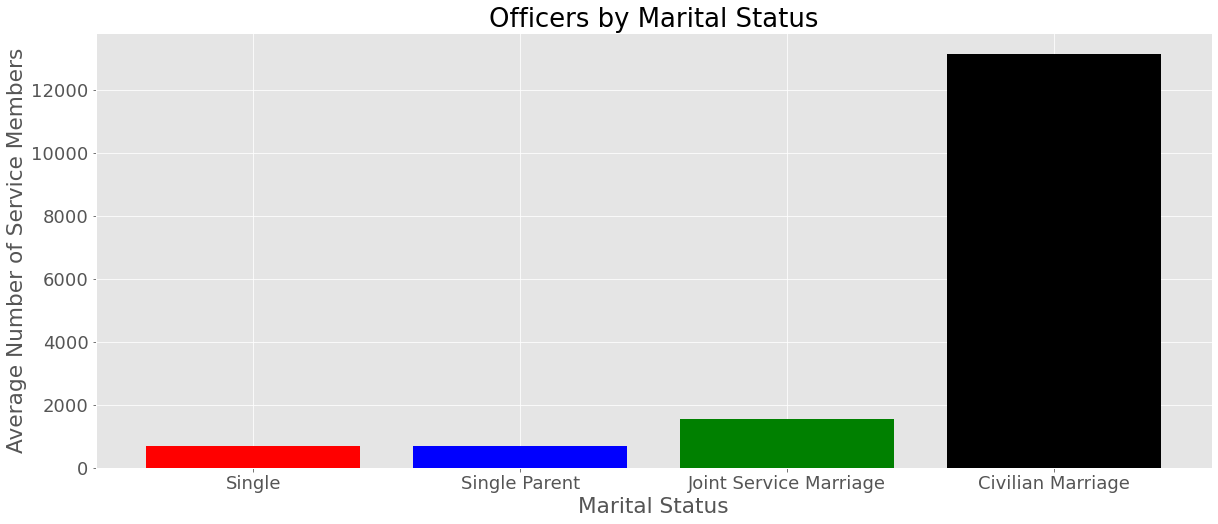

In [99]:
marital_status_bar_mean(officer_df)

In [100]:


y = married_prop, unmarried_prop
fig, ax = plt.subplots(figsize=(20,8))
x = 'Married','Unmarried'
plt.bar(x, y, color = ["green"]  )

NameError: name 'unmarried_prop' is not defined

In [101]:
def ad_marital_status_bar_mean(save_bool, plot_bool):
    '''Function that creates bar plot of mean of officer or enlisted married personel by rank
    takes in a dataframe'''
    single_total = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Single Total'].values) + int(ad_marital_index.loc[['TOTAL OFFICER'],'Single Total'].values)
    single_parent_total = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Single Parent Total'].values) + int(ad_marital_index.loc[['TOTAL OFFICER'],'Single Parent Total'].values)
    joint_service_marriage_total = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Joint Service Marriage Total'].values) + int(ad_marital_index.loc[['TOTAL OFFICER'],'Joint Service Marriage Total'].values)
    civilian_married_total = int(ad_marital_index.loc[['TOTAL OFFICER'],'Civilian Married Total'].values) + int(ad_marital_index.loc[['TOTAL ENLISTED'],'Civilian Married Total'].values)


    single_total_mean =np.mean(single_total)
    single_parent_total_mean =np.mean(single_parent_total)
    joint_service_marriage_total_mean = np.mean(joint_service_marriage_total)
    civilian_married_total_mean = np.mean(civilian_married_total)
    y = single_total_mean, single_parent_total_mean, joint_service_marriage_total_mean, civilian_married_total_mean
    labels = ['Single', 'Single Parent', 'Joint Service Marriage', 'Civilian Marriage' ]

    x=np.arange(len(labels))
    width = 0.23

    fig, ax = plt.subplots(figsize=(20,8)) 
    plt.bar(x, y,color=['red', 'blue', 'green', 'black'] )
    
    plt.xticks(x, labels)
  
    plt.title('Service Members by Marital Status')
    plt.xlabel('Marital Status')
    plt.ylabel('Average Number of Service Members')
    plt.rcParams.update({'font.size': 18})
    if save_bool == 1:
        plt.savefig('AD Marrital Status')
    if plot_bool == 1:
        plt.show()
    return 

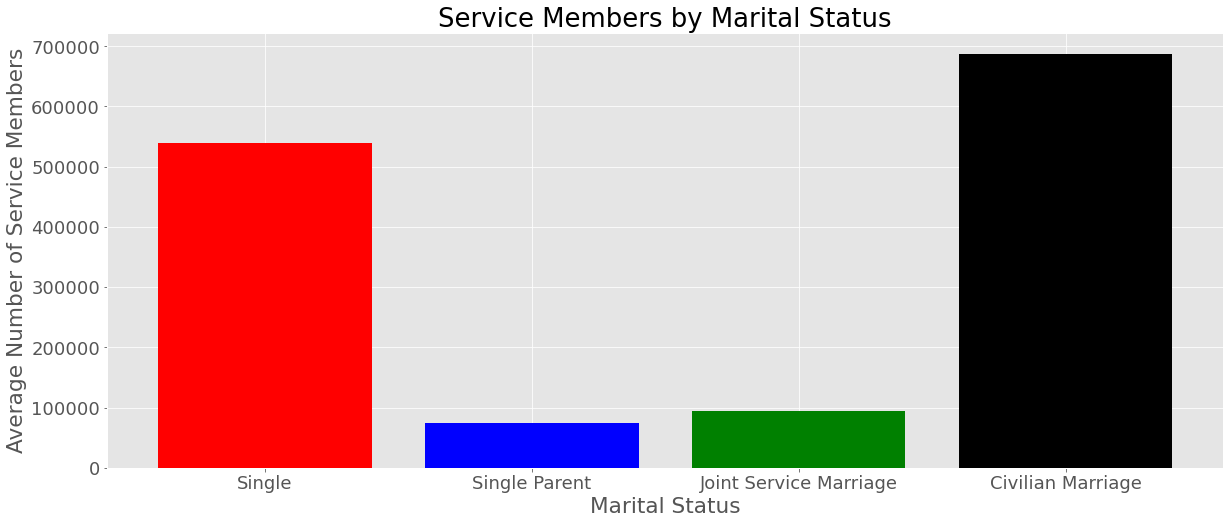

In [102]:
ad_marital_status_bar_mean(1,1)

In [103]:
single_total = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Single Total'].values) + int(ad_marital_index.loc[['TOTAL OFFICER'],'Single Total'].values)
single_parent_total = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Single Parent Total'].values) + int(ad_marital_index.loc[['TOTAL OFFICER'],'Single Parent Total'].values)
joint_service_marriage_total = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Joint Service Marriage Total'].values) + int(ad_marital_index.loc[['TOTAL OFFICER'],'Joint Service Marriage Total'].values)
civilian_married_total = int(ad_marital_index.loc[['TOTAL OFFICER'],'Civilian Married Total'].values) + int(ad_marital_index.loc[['TOTAL ENLISTED'],'Civilian Married Total'].values)

In [104]:

y= np.array([single_total, single_parent_total, joint_service_marriage_total, civilian_married_total])
mylabels = ["Single", "Single Parent", "Joint Service Married", "Civilian Married"]

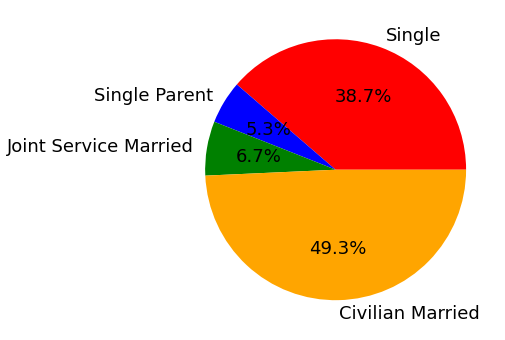

In [105]:
plt.figure(figsize = (16,6))
plt.pie(y, labels = mylabels, autopct = "%0.01f%%" ,colors=['red', 'blue', 'green', 'orange'])

plt.show() 

In [117]:
def ad_pie_chart(df,save_bool, plot_bool):
    
    single_total = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Single Total'].values), int(ad_marital_index.loc[['TOTAL OFFICER'],'Single Total'].values)
    single_parent_total = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Single Parent Total'].values), int(ad_marital_index.loc[['TOTAL OFFICER'],'Single Parent Total'].values)
    joint_service_marriage_total = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Joint Service Marriage Total'].values), int(ad_marital_index.loc[['TOTAL OFFICER'],'Joint Service Marriage Total'].values)
    civilian_married_total = int(ad_marital_index.loc[['TOTAL OFFICER'],'Civilian Married Total'].values), int(ad_marital_index.loc[['TOTAL ENLISTED'],'Civilian Married Total'].values)

    y= np.array([single_total, single_parent_total, joint_service_marriage_total, civilian_married_total])
    mylabels = ["Single", "Single Parent", "Joint Service Married", "Civilian Married"]

    plt.figure(figsize = (16,6))
    plt.rcParams.update({'font.size': 18})
    plt.pie(y, labels = mylabels, autopct = "%0.1f%%" ,colors=['red', 'blue', 'green', 'orange'])
    
    if save_bool == 1:
        plt.savefig('AD Pie Chart')
    if plot_bool == 1:
        plt.show()
        plt.grid()

ValueError: x must be 1D

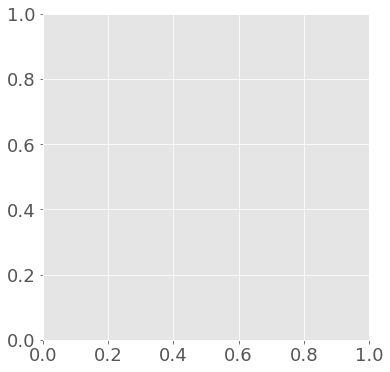

In [118]:
ad_pie_chart(enlisted_df,0,1)

In [23]:
def plot_totals_rank(df,save_bool, plot_bool, figname= 'Marrital Status Multiple Plot By Rank'):
    '''EDA plot of service members by rank and their marital status,
    takes in a data frame and whether the data frame contains enlisted or married soldiers
    takes in bools to determine if you would like to view, save or both'''
   
    #Create dataframes
    x = df['Pay Grade']
    single_total= df['Single Total']
    single_parent_total = df['Single Parent Total']
    joint_service_marriage_total= df['Joint Service Marriage Total']
    civilian_married_total = df['Civilian Married Total']

    #Create plot
    fig, ax = plt.subplots(figsize=(16,6)) 
    plt.rcParams.update({'font.size': 18})
    
    ax.plot(x, single_total, label = 'Single Total') 
    ax.plot(x, single_parent_total,label = 'Single Parent Total')
    ax.plot(x, joint_service_marriage_total,label = 'Joint Service Marriage Total')
    ax.plot(x,civilian_married_total ,label = 'Civilian Marriage Total')
    plt.legend(loc="upper right")
    plt.title('Service Members By Marital Status')
    plt.xlabel('Rank')
    plt.ylabel('Number of Service Members')
    
    if save_bool == 1:
        plt.savefig(figname)
    if plot_bool == 1:
        plt.show()
        plt.grid()

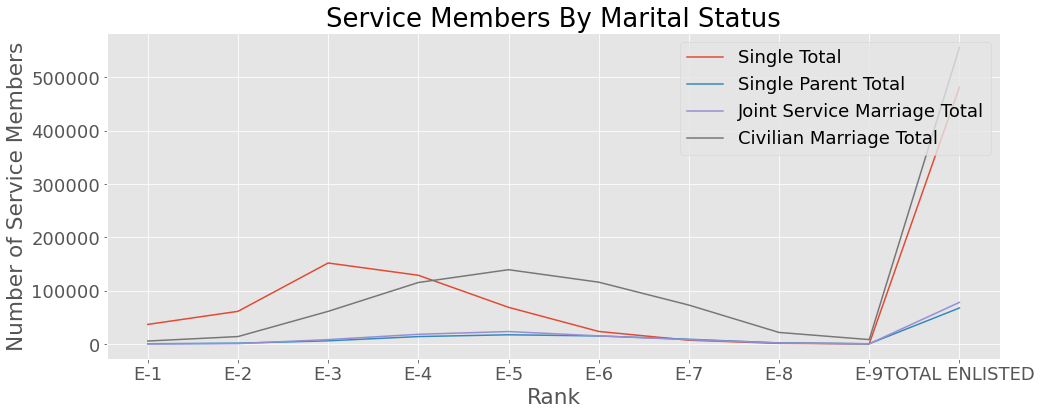

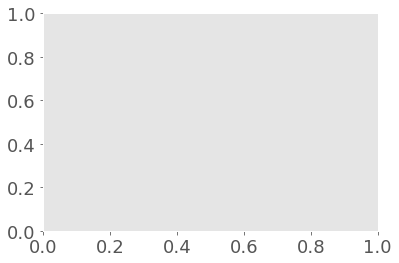

In [24]:
plot_totals_rank(enlisted_df, 0,1)

In [31]:

def plot_prop_rank(save_bool, plot_bool, figname= 'Marrital Status Multiple Plot By Rank'):
    '''EDA plot of service members by rank and their marital status,
    takes in a data frame and whether the data frame contains enlisted or married soldiers
    takes in bools to determine if you would like to view, save or both'''
    officer_df2 = ad_marital_status[10:20]
    enlisted_df2 = ad_marital_status[:9]
    
    #Create dataframes
    x = enlisted_df2['Pay Grade']
    single_total= enlisted_df2['Single Total']/enlisted_df2['Grand Total']
    single_parent_total = enlisted_df2['Single Parent Total']/enlisted_df2['Grand Total']
    joint_service_marriage_total= enlisted_df2['Joint Service Marriage Total']/enlisted_df2['Grand Total']
    civilian_married_total = enlisted_df2['Civilian Married Total']/enlisted_df2['Grand Total']

    x2 = officer_df2['Pay Grade']
    single_total2= officer_df2['Single Total']/officer_df2['Grand Total']
    single_parent_total2 = officer_df2['Single Parent Total']/officer_df2['Grand Total']
    joint_service_marriage_total2= officer_df2['Joint Service Marriage Total']/officer_df2['Grand Total']
    civilian_married_total2 = officer_df2['Civilian Married Total']/officer_df2['Grand Total']

    #Create plot
    fig, ax = plt.subplots(2,figsize=(10,5),dpi=200)
    
    fig.suptitle('Service Member Marital Status By Rank')


    ax[0].plot(x, single_total, label = 'Single Total', color=('red')) 
    ax[0].plot(x, single_parent_total,label = 'Single Parent Total',color=('blue'))
    ax[0].plot(x, joint_service_marriage_total,label = 'Joint Service Marriage Total',color=('green'))
    ax[0].plot(x,civilian_married_total ,label = 'Civilian Marriage Total',color=('orange'))

    ax[1].plot(x2, single_total2,color=('red')) 
    ax[1].plot(x2, single_parent_total2,color=('blue'))
    ax[1].plot(x2, joint_service_marriage_total2,color=('green'))
    ax[1].plot(x2,civilian_married_total2,color=('orange'))
    
    fig.legend(loc="upper right",fontsize=10)
    
    fig.text(0.5, 0.02, 'Rank', ha='center')
    fig.text(0.04, 0.5, 'Number of Service Members', va='center', rotation='vertical')
  
    if save_bool == 1:
        plt.savefig(figname)
    if plot_bool == 1:
        plt.show()
        

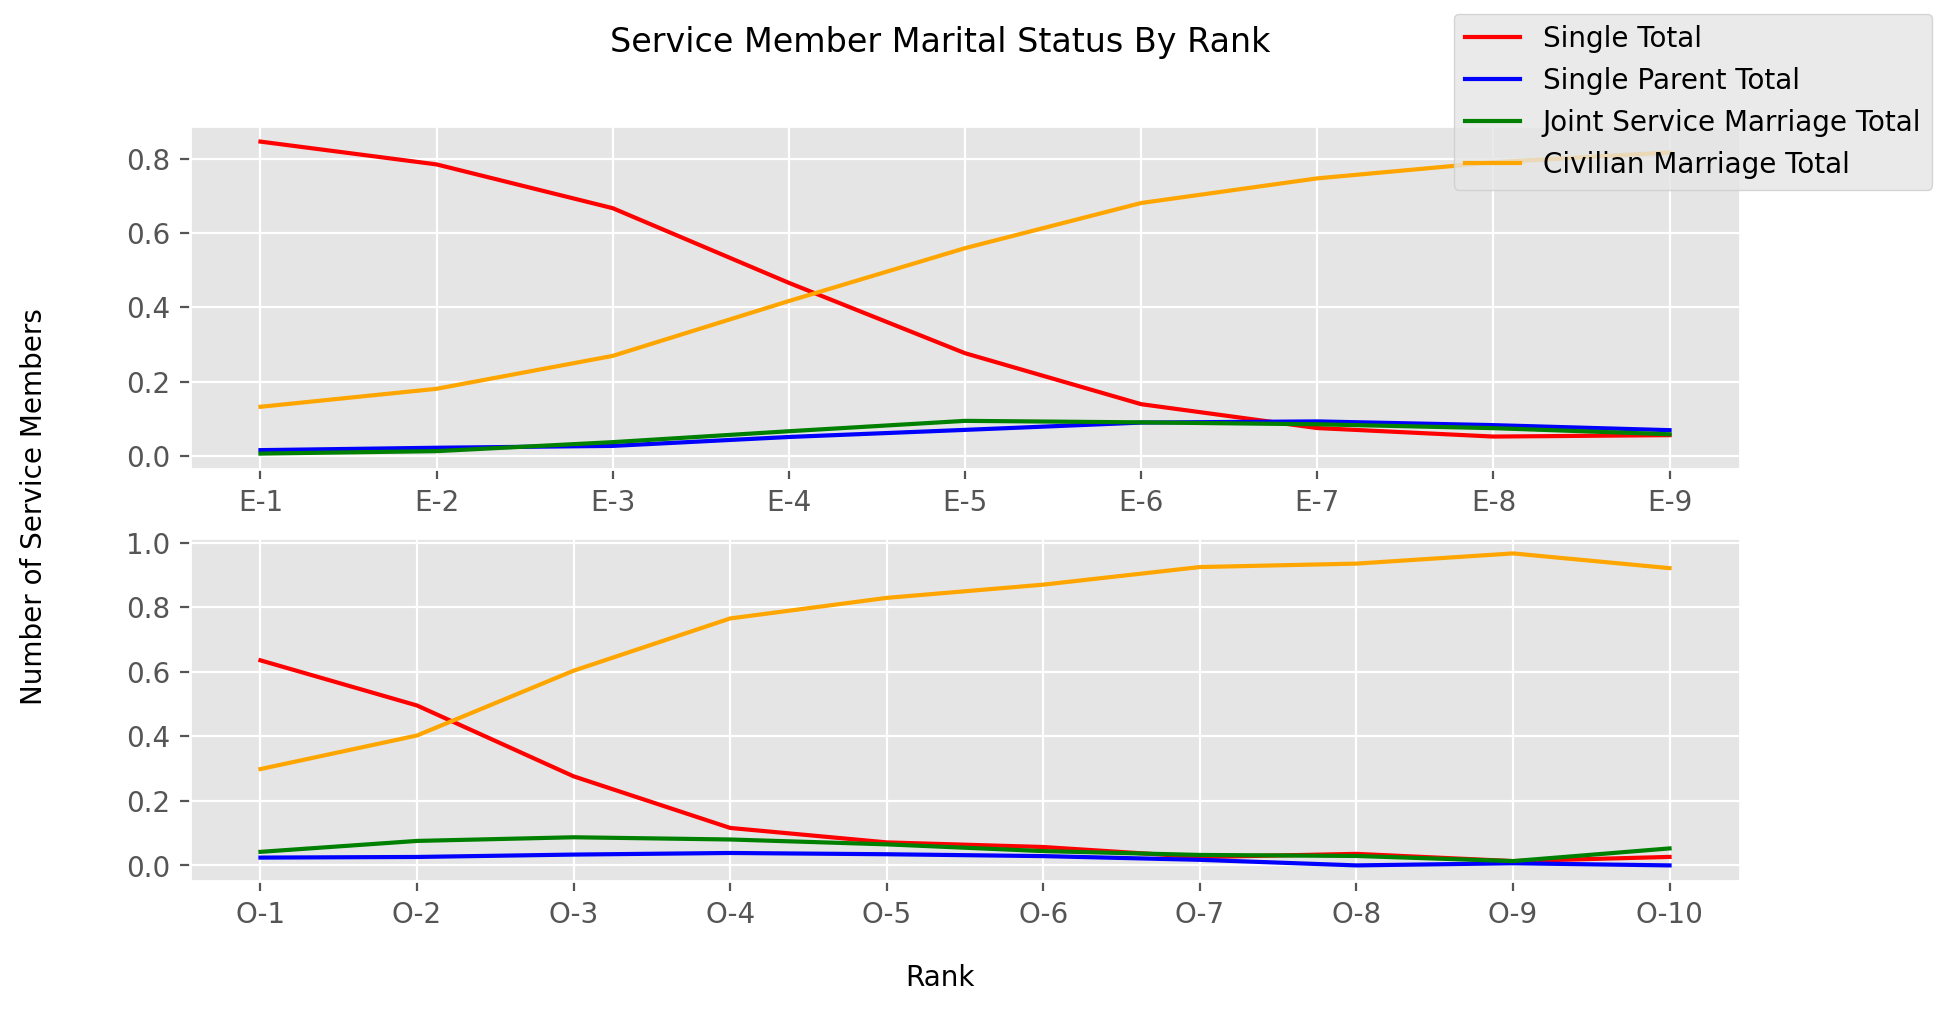

In [29]:
ztest_variables()
plot_totals_rank(0,1)

In [30]:
officer_df2 = ad_marital_status[10:20]
enlisted_df2 = ad_marital_status[:9]

In [20]:
enlisted_df2['Single Total']

0     36946
1     61482
2    152110
3    129091
4     69010
5     23779
6      7359
7      1447
8       583
Name: Single Total, dtype: int64

In [21]:
officer_df2['Single Total']

10    16576
11    13744
12    19607
13     5200
14     2054
15      702
16       12
17       11
18        2
19        1
Name: Single Total, dtype: int64